In [85]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data = pd.read_csv('realDonaldTrump_tweets.csv')

In [17]:
data['created_at'] = pd.to_datetime(data['created_at'])
data.set_index(['created_at'], drop=True, inplace=True)

In [18]:
data['count'] = 1

In [19]:
data.groupby(['source'])['count'].sum()

source
Instagram                 2
Media Studio              1
Periscope                 1
Twitter Ads               1
Twitter Web Client      273
Twitter for Android    1438
Twitter for iPad         22
Twitter for iPhone     1462
Name: count, dtype: int64

In [29]:
count_words = lambda x: len(x.split())
character_count = lambda x: len(x)
tokenize = lambda x: nltk.word_tokenize(x.decode('utf-8'))
tweet_tokenize = lambda x: TweetTokenizer().tokenize(x.decode('utf-8'))
sentence_count = lambda x: len(nltk.sent_tokenize(x.decode('utf-8')))

In [22]:
data['word_count'] = data['text'].apply(count_words)

In [23]:
data['character_count'] = data['text'].apply(character_count)

In [24]:
data['sentence_count'] = data['text'].apply(sentence_count)

In [25]:
data['tokens'] = data['text'].apply(tokenize)

In [30]:
data['tweet_tokens'] = data['text'].apply(tweet_tokenize)

In [27]:
data['token_count'] = data['tokens'].apply(character_count)

In [31]:
data.head(5)

,id,text,source,count,word_count,character_count,sentence_count,tokens,tweet_tokens,token_count
created_at,,,,,,,,,,
2017-02-22 12:50:56,834384982495940613,Very much enjoyed my tour of the Smithsonian's...,Twitter for Android,1,22,140,1,"[Very, much, enjoyed, my, tour, of, the, Smith...","[Very, much, enjoyed, my, tour, of, the, Smith...",26
2017-02-22 12:20:40,834377364947816448,"One thing I will say about Rep. Keith Ellison,...",Twitter for Android,1,29,137,1,"[One, thing, I, will, say, about, Rep., Keith,...","[One, thing, I, will, say, about, Rep, ., Keit...",32
2017-02-21 23:23:13,834181712783560705,The so-called angry crowds in home districts o...,Twitter for Android,1,21,136,2,"[The, so-called, angry, crowds, in, home, dist...","[The, so-called, angry, crowds, in, home, dist...",25
2017-02-21 20:46:42,834142323881684993,'Americans overwhelmingly oppose sanctuary cit...,Twitter for iPhone,1,6,74,1,"['Americans, overwhelmingly, oppose, sanctuary...","[', Americans, overwhelmingly, oppose, sanctua...",9
2017-02-21 00:38:40,833838311315763200,Congratulations to our new National Security A...,Twitter for iPhone,1,13,131,3,"[Congratulations, to, our, new, National, Secu...","[Congratulations, to, our, new, National, Secu...",21


In [74]:
def histogram(data, start, end):
    start = datetime.datetime.strptime(start, "%Y-%m-%d")
    end = datetime.datetime.strptime(end, "%Y-%m-%d")
    data['x'] = data.index
    data = data[(data.x>datetime.date(year=start.year,month=start.month,day=start.day))\
                &(data.x<=datetime.date(year=end.year,month=end.month,day=end.day))]
    time_10 = data.groupby(pd.TimeGrouper(freq='10Min'))['count', 'character_count'].sum()
    grp = time_10.groupby(by=[time_10.index.map(lambda x : '{0:02}:{1:02}'.format(x.hour, x.minute))]).sum()
    grp = grp.fillna(0)
    grp['count'].plot()

In [100]:
def word_evolution(data, start, end):
    start = datetime.datetime.strptime(start, "%Y-%m-%d")
    end = datetime.datetime.strptime(end, "%Y-%m-%d")
    data['x'] = data.index
    data = data[(data.x>datetime.date(year=start.year,month=start.month,day=start.day))\
                &(data.x<=datetime.date(year=end.year,month=end.month,day=end.day))]
    tokens = data['tweet_tokens'].values
    words = [i.lower() for i in sum(tokens, [])]
    stop_words = list(set(stopwords.words('english')))
    junkish = ['.', ':', '!', "'", '@', 'https', '#', '"', ',', '``', "''", '-', ';', \
           '&', 'amp', "n't", "'s", '?', 'rt', '(',')', '%', '...', '--', 'co', \
           'clinton', '#realdonaldtrump','#trump2016', u'\u2026', u'\u2019', '@realdonaldtrump',\
           '#makeamericagreatagain', '#maga', 'u']
    filtered_words = [word for word in words if word not in junkish+stop_words]
    fdist = FreqDist(filtered_words)
    print fdist.most_common(20)
    fdist.plot(25, cumulative=True)
    return filtered_words

[(u'hillary', 233), (u'great', 221), (u'thank', 219), (u'crooked', 156), (u'trump', 130), (u'america', 95), (u'people', 88), (u'make', 85), (u'new', 73), (u'bad', 65), (u'president', 60), (u'bernie', 60), (u'many', 57), (u'get', 55), (u'today', 52), (u'jobs', 49), (u'country', 48), (u'media', 46), (u'never', 45), (u'would', 45)]


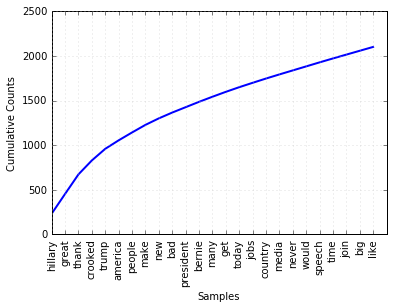

In [105]:
filtered_words = word_evolution(data, '2016-01-20', '2016-08-01')

In [150]:
def generate_wordcloud(words):
    text = ' '.join(words)
    text = text.replace('thank', 'thanks')
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=['co', 'thank', 'http', 'https'], background_color='black', max_words=2000).generate(text)
    
    # Display the generated image:
    # the matplotlib way:
    
    plt.imshow(wordcloud)
    plt.axis("off")
    
    # lower max_font_size
    wordcloud = WordCloud(stopwords=['co', 'thank', 'http', 'https'], max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

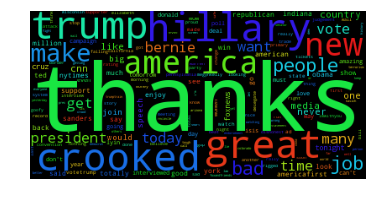

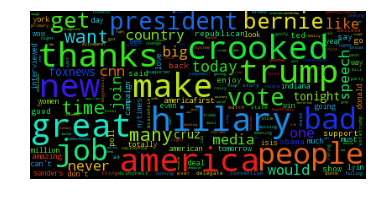

In [108]:
generate_wordcloud(filtered_words)

In [129]:
def groupby_time(data):
    time_10 = data.groupby(pd.TimeGrouper(freq='10Min'))['count', 'character_count'].sum()
    grp = time_10.groupby(by=[time_10.index.map(lambda x : '{0:02}:{1:02}'.format(x.hour, x.minute))]).sum()
    grp = grp.fillna(0)
    return grp

def groupby_dayofweek(data):
    time_10 = data.groupby(pd.TimeGrouper(freq='10Min'))['count', 'character_count'].sum()
    grp = time_10.groupby(by=[time_10.index.map(lambda x : '{0}'.format(x.dayofweek))]).sum()
    grp = grp.fillna(0)
    return grp

def groupby_month(data):
    time_10 = data.groupby(pd.TimeGrouper(freq='10Min'))['count', 'character_count'].sum()
    grp = time_10.groupby(by=[time_10.index.map(lambda x : '{0} {1}'.format(x.year, x.month))]).sum()
    grp = grp.fillna(0)
    return grp

def groupby_daily(data):
    grp = data.groupby(pd.TimeGrouper(freq='1d'))['count', 'character_count'].sum()
    #grp = time_10.groupby(by=[time_10.index.map(lambda x : '{0} {1}'.format(x.year, x.month))]).sum()
    grp = grp.fillna(0)
    return grp
    
def histogram_multiple(data, start, end, grouper):
    start = datetime.datetime.strptime(start, "%Y-%m-%d")
    end = datetime.datetime.strptime(end, "%Y-%m-%d")
    data['x'] = data.index
    data = data[(data.x>datetime.date(year=start.year,month=start.month,day=start.day))\
                &(data.x<=datetime.date(year=end.year,month=end.month,day=end.day))]
    android = grouper(data[data.source=='Twitter for Android'])
    iphone = grouper(data[data.source=='Twitter for iPhone'])
    print android['count']
    print iphone['count']
    plt.plot(android['count'].values, label='Android')
    plt.plot(iphone['count'].values, label='iPhone')
    plt.legend()

0    195
1    171
2    231
3    172
4    163
5    218
6    282
Name: count, dtype: float64
0    190
1    271
2    248
3    246
4    212
5    171
6    122
Name: count, dtype: float64


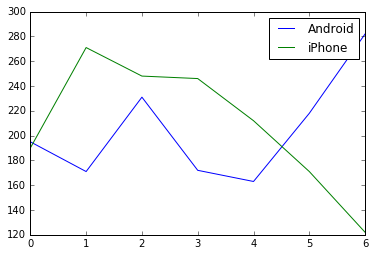

In [130]:
histogram_multiple(data, '2016-01-01', '2017-02-20', groupby_dayofweek)

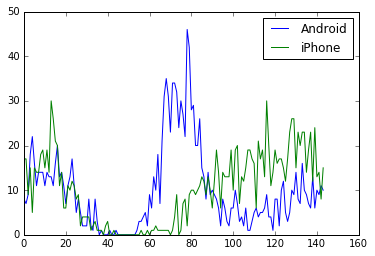

In [122]:
histogram_multiple(data, '2016-01-01', '2017-02-20', groupby_time)

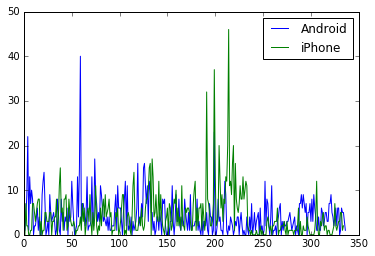

In [128]:
histogram_multiple(data, '2016-01-01', '2017-02-20', groupby_daily)

In [131]:
from nltk.corpus import inaugural

In [134]:
trump_speech = ("Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, "
                "fellow Americans and people of the world, thank you."
                "We, the citizens of America, are now joined in a great national effort to "
                "rebuild our country and restore its promise for all of our people. "
                "Together, we will determine the course of America and the world for many, many years to come. "
                "We will face challenges. We will confront hardships. But we will get the job done. "
                "Every four years we gather on these steps to carry out the orderly and peaceful transfer of power. "
                "And we are grateful to President Obama and first lady Michelle Obama for their gracious aid "
                "throughout this transition. They have been magnificent. Thank you. "
                "Today's ceremony, however, has a very special meaning because today we are not merely "
                "transferring power from one administration to another or from one party to another, but we are "
                "transferring power from Washington, D.C., and giving it back to you, the people. "
                "For too long, a small group in our nation's capital has reaped the rewards of "
                "government while the people have bore the cost. Washington flourished, but "
                "the people did not share in its wealth. Politicians prospered but the jobs left and the factories closed. "
                "The establishment protected itself, but not the citizens of our country. Their "
                "victories have not been your victories. Their triumphs have not been your triumphs. "
                "And while they celebrated in our nation's capital, there was little to celebrate for "
                "struggling families all across our land. "
                "That all changes starting right here and right now, because this moment is your moment. "
                "It belongs to you. "
                "It belongs to everyone gathered here today and everyone watching all across America. "
                "This is your day. "
                "This is your celebration. "
                "And this, the United States of America, is your country. "
                "What truly matters is not which party controls our government, but whether our government "
                "is controlled by the people. January 20th, 2017, will be remembered as the day "
                "the people became the rulers of this nation again. The forgotten men and women of "
                "our country will be forgotten no longer. Everyone is listening to you now. You came "
                "by the tens of millions to become part of a historic movement, the likes of which "
                "the world has never seen before. At the center of this movement is a crucial conviction "
                "that a nation exists to serve its citizens. Americans want great schools for their children, "
                "safe neighborhoods for their families and good jobs for themselves. "
                "These are just and reasonable demands of righteous people and a righteous public. "
                "But for too many of our citizens, a different reality exists. "
                "Mothers and children trapped in poverty in our inner cities, rusted out factories scattered "
                "like tombstones across the landscape of our nation. An education system flush with cash but "
                "which leaves our young and beautiful students deprived of all knowledge. "
                "And the crime and the gangs and the drugs that have stolen too many lives and robbed our country "
                "of so much unrealized potential. This American carnage stops right here and stops right now. "
                "We are one nation, and their pain is our pain. "
                "Their dreams are our dreams, and their success will be our success. We share one heart, "
                "one home and one glorious destiny. The oath of office I take today is an oath of allegiance to "
                "all Americans. For many decades we've enriched foreign industry at the expense of American "
                "industry, subsidized the armies of other countries while allowing for the very sad depletion "
                "of our military. We've defended other nations' borders while refusing to defend our own. And "
                "we've spent trillions and trillions of dollars overseas while America's infrastructure has "
                "fallen into disrepair and decay. We've made other countries rich while the wealth, strength "
                "and confidence of our country has dissipated over the horizon. One by one, the factories "
                "shuttered and left our shores with not even a thought about the millions and millions of "
                "American workers that were left behind. The wealth of our middle class has been ripped from "
                "their homes and then redistributed all across the world. But that is the past, and now we "
                "are looking only to the future. We assembled here today are issuing a new decree to be heard "
                "in every city, in every foreign capital and in every hall of power. From this day forward, "
                "a new vision will govern our land. From this day forward, it's going to be only America first, "
                "America first. Every decision on trade, on taxes, on immigration, on foreign affairs will "
                "be made to benefit American workers and American families. We must protect our borders from "
                "the ravages of other countries making our product, stealing our companies and destroying our "
                "jobs. Protection will lead to great prosperity and strength. I will fight for you with every "
                "breath in my body, and I will never ever let you down. America will start winning again, "
                "winning like never before. We will bring back our jobs. We will bring back our borders. "
                "We will bring back our wealth, and we will bring back our dreams. "
                "We will build new roads and highways and bridges and airports and tunnels and railways "
                "all across our wonderful nation. We will get our people off of welfare and back to work, "
                "rebuilding our country with American hands and American labor. We will follow two "
                "simple rules: Buy American and hire American. We will seek friendship and goodwill "
                "with the nations of the world, but we do so with the understanding that it is the right "
                "of all nations to put their own interests first. "
                "We do not seek to impose our way of life on anyone, but rather to let it shine as an example. "
                "We will shine for everyone to follow. "
                "We will re-enforce old alliances and form new ones and unite the civilized world against "
                "radical Islamic terrorism, which we will eradicate completely from the face of the earth. "
                "At the bedrock of our politics will be a total allegiance to the United States of America, "
                "and through our loyalty to our country we will rediscover our loyalty to each other. "
                "When you open your heart to patriotism, there is no room for prejudice. "
                "The Bible tells us how good and pleasant it is when God's people live together in unity. "
                "We must speak our minds openly, debate our disagreements honestly, but always pursue "
                "solidarity. When America is united, America is totally unstoppable. There should be no "
                "fear. We are protected and we will always be protected. We will be protected by the great "
                "men and women of our military and law enforcement. And most importantly, we will be "
                "protected by God. Finally, we must think big and dream even bigger. In America, we "
                "understand that a nation is only living as long as it is striving. We will no longer "
                "accept politicians who are all talk and no action, constantly complaining but never "
                "doing anything about it. The time for empty talk is over. Now arrives the hour of action. "
                "Do not allow anyone to tell you that it cannot be done. No challenge can match the heart "
                "and fight and spirit of America. We will not fail. Our country will thrive and prosper again. "
                "We stand at the birth of a new millennium, ready to unlock the mysteries of space, "
                "to free the earth from the miseries of disease, and to harness the energies, industries "
                "and technologies of tomorrow. A new national pride will stir ourselves, lift our sights "
                "and heal our divisions. It's time to remember that old wisdom our soldiers will never "
                "forget, that whether we are black or brown or white, we all bleed the same red blood "
                "of patriots. We all enjoy the same glorious freedoms and we all salute the same great "
                "American flag. And whether a child is born in the urban sprawl of Detroit or the "
                "windswept plains of Nebraska, they look up at the same night sky, they fill their heart "
                "with the same dreams and they are infused with the breath of life by the same almighty "
                "creator. So to all Americans in every city near and far, small and large, from mountain "
                "to mountain, from ocean to ocean, hear these words: You will never be ignored again. "
                "Your voice, your hopes and your dreams will define our American destiny. And your courage "
                "and goodness and love will forever guide us along the way. "
                "Together we will make America strong again, we will make America "
                "wealthy again, we will make America proud again, we will make America safe again. "
                "And, yes, together we will make America great again. "
                "Thank you. God bless you. And God bless America.")

In [157]:
def generate_wordcloud2(text, stop_words):
    if type(text)==list:
        text = ' '.join(text)
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stop_words, background_color='black', max_words=2000).generate(text)
    
    # Display the generated image:
    # the matplotlib way:
    
    plt.imshow(wordcloud)
    plt.axis("off")
    
    # lower max_font_size
    wordcloud = WordCloud(stopwords=stop_words, max_font_size=50).generate(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [152]:
print inaugural.fileids()

[u'1789-Washington.txt', u'1793-Washington.txt', u'1797-Adams.txt', u'1801-Jefferson.txt', u'1805-Jefferson.txt', u'1809-Madison.txt', u'1813-Madison.txt', u'1817-Monroe.txt', u'1821-Monroe.txt', u'1825-Adams.txt', u'1829-Jackson.txt', u'1833-Jackson.txt', u'1837-VanBuren.txt', u'1841-Harrison.txt', u'1845-Polk.txt', u'1849-Taylor.txt', u'1853-Pierce.txt', u'1857-Buchanan.txt', u'1861-Lincoln.txt', u'1865-Lincoln.txt', u'1869-Grant.txt', u'1873-Grant.txt', u'1877-Hayes.txt', u'1881-Garfield.txt', u'1885-Cleveland.txt', u'1889-Harrison.txt', u'1893-Cleveland.txt', u'1897-McKinley.txt', u'1901-McKinley.txt', u'1905-Roosevelt.txt', u'1909-Taft.txt', u'1913-Wilson.txt', u'1917-Wilson.txt', u'1921-Harding.txt', u'1925-Coolidge.txt', u'1929-Hoover.txt', u'1933-Roosevelt.txt', u'1937-Roosevelt.txt', u'1941-Roosevelt.txt', u'1945-Roosevelt.txt', u'1949-Truman.txt', u'1953-Eisenhower.txt', u'1957-Eisenhower.txt', u'1961-Kennedy.txt', u'1965-Johnson.txt', u'1969-Nixon.txt', u'1973-Nixon.txt', u'

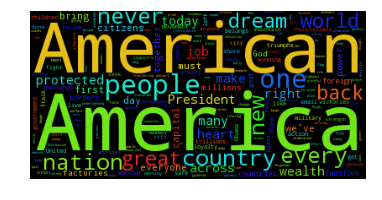

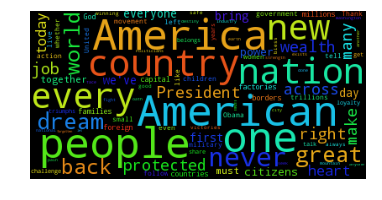

In [158]:
generate_wordcloud2(trump_speech, list(set(stopwords.words('english'))))

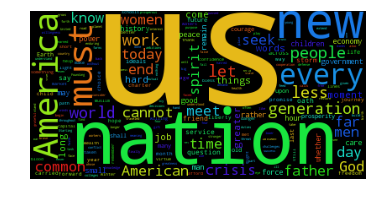

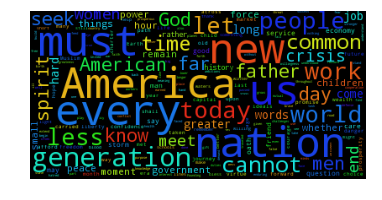

In [159]:
generate_wordcloud2(list(inaugural.words('2009-Obama.txt')), list(set(stopwords.words('english'))))

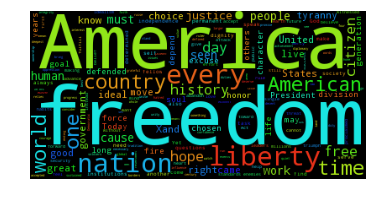

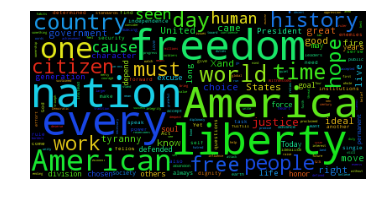

In [160]:
generate_wordcloud2(list(inaugural.words('2005-Bush.txt')), list(set(stopwords.words('english'))))